# Downloading & Unzipping dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mustafaosama22","key":"387658f8d9511f7324f10657a3092d0f"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir dataset

In [ ]:
%cd /content/dataset

/content/dataset


In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.01G/1.03G [00:06<00:00, 186MB/s]
100% 1.03G/1.03G [00:06<00:00, 166MB/s]


In [ ]:
!unzip -x /content/dataset/asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

# Explore the dataset

In [ ]:
import os
for folder in os.listdir('/content/dataset/asl_alphabet_train/asl_alphabet_train'):
  images = [x for x in os.listdir(f'/content/dataset/asl_alphabet_train/asl_alphabet_train/{folder}') if (x.endswith('.jpg') or x.endswith('.jpeg'))]
  print(f'{folder} : {len(images)} images')

nothing : 3000 images
V : 3000 images
G : 3000 images
O : 3000 images
K : 3000 images
U : 3000 images
P : 3000 images
Z : 3000 images
I : 3000 images
H : 3000 images
del : 3000 images
W : 3000 images
L : 3000 images
space : 3000 images
A : 3000 images
N : 3000 images
X : 3000 images
T : 3000 images
E : 3000 images
Y : 3000 images
S : 3000 images
C : 3000 images
D : 3000 images
Q : 3000 images
F : 3000 images
R : 3000 images
J : 3000 images
B : 3000 images
M : 3000 images


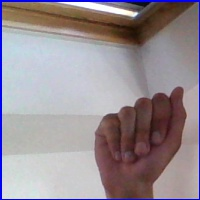

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread('/content/dataset/asl_alphabet_train/asl_alphabet_train/A/A1018.jpg')
cv2_imshow(img)

In [ ]:
img.shape

(200, 200, 3)

# Data Generator

In [ ]:
CLASSES_labels = {}
for index, folder in enumerate(os.listdir('/content/dataset/asl_alphabet_train/asl_alphabet_train')):
  CLASSES_labels[folder] = index

CLASSES_labels

{'A': 14,
 'B': 27,
 'C': 21,
 'D': 22,
 'E': 18,
 'F': 24,
 'G': 2,
 'H': 9,
 'I': 8,
 'J': 26,
 'K': 4,
 'L': 12,
 'M': 28,
 'N': 15,
 'O': 3,
 'P': 6,
 'Q': 23,
 'R': 25,
 'S': 20,
 'T': 17,
 'U': 5,
 'V': 1,
 'W': 11,
 'X': 16,
 'Y': 19,
 'Z': 7,
 'del': 10,
 'nothing': 0,
 'space': 13}

In [ ]:
files = os.listdir("/content/dataset/asl_alphabet_train/asl_alphabet_train")
images_path = []
images_labels = []

for file_ in files:
  paths = [path for path in os.listdir(f'/content/dataset/asl_alphabet_train/asl_alphabet_train/{file_}') if (path.endswith('.jpg') or path.endswith('.jpeg'))]
  for path in paths:
    images_path.append(f'/content/dataset/asl_alphabet_train/asl_alphabet_train/{file_}/{path}')
    images_labels.append(CLASSES_labels[f'{file_}'])

len(images_path), len(images_labels)

(87000, 87000)

In [ ]:
from sklearn.model_selection import train_test_split

images_paths_train, images_paths_validation, images_labels_train, images_labels_validation = train_test_split(images_path, images_labels, test_size=0.1, stratify=images_labels, random_state=42)

In [ ]:
images_paths_test = []
images_labels_test = []
test_file = os.listdir('/content/dataset/asl_alphabet_test/asl_alphabet_test')

for image in test_file:
  images_paths_test.append(f'/content/dataset/asl_alphabet_test/asl_alphabet_test/{image}')
  label = image.split('_')[0]
  images_labels_test.append(CLASSES_labels[f'{label}'])

len(images_paths_test), len(images_labels_test)

(28, 28)

In [ ]:
images_paths_test , images_labels_test

(['/content/dataset/asl_alphabet_test/asl_alphabet_test/F_test.jpg',
  '/content/dataset/asl_alphabet_test/asl_alphabet_test/P_test.jpg',
  '/content/dataset/asl_alphabet_test/asl_alphabet_test/C_test.jpg',
  '/content/dataset/asl_alphabet_test/asl_alphabet_test/I_test.jpg',
  '/content/dataset/asl_alphabet_test/asl_alphabet_test/Z_test.jpg',
  '/content/dataset/asl_alphabet_test/asl_alphabet_test/H_test.jpg',
  '/content/dataset/asl_alphabet_test/asl_alphabet_test/D_test.jpg',
  '/content/dataset/asl_alphabet_test/asl_alphabet_test/O_test.jpg',
  '/content/dataset/asl_alphabet_test/asl_alphabet_test/M_test.jpg',
  '/content/dataset/asl_alphabet_test/asl_alphabet_test/E_test.jpg',
  '/content/dataset/asl_alphabet_test/asl_alphabet_test/S_test.jpg',
  '/content/dataset/asl_alphabet_test/asl_alphabet_test/X_test.jpg',
  '/content/dataset/asl_alphabet_test/asl_alphabet_test/U_test.jpg',
  '/content/dataset/asl_alphabet_test/asl_alphabet_test/R_test.jpg',
  '/content/dataset/asl_alphabet_t

In [ ]:
import tensorflow.keras as keras
import numpy as np
import imgaug.augmenters as iaa
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
!pip install git+https://github.com/aleju/imgaug.git

  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-_v8olb6g
  Running command git clone -q https://github.com/aleju/imgaug.git /tmp/pip-req-build-_v8olb6g
  Created wheel for imgaug: filename=imgaug-0.4.0-py3-none-any.whl size=971122 sha256=71231ddaf0e64ae4d495df0a6d3df3a3c1d4486cfdbab7aa409b3aa8b40969f0
  Stored in directory: /tmp/pip-ephem-wheel-cache-xuka08rw/wheels/0c/78/b5/9303fae9d5e03df1f319adfe4e6534180b5c3232de11bc9a2f
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


In [ ]:
class DataGenerator(keras.utils.Sequence):
  'Generates data for Keras'
  def __init__(self, list_IDs, labels, batch_size=16, dim=(200,200), n_channels=3,
              n_classes=29, shuffle=True, augmentation=True):
    'Initialization'
    self.dim = dim
    self.batch_size = batch_size
    self.labels = labels                         
    self.list_IDs = list_IDs
    self.n_channels = n_channels
    self.n_classes = n_classes
    self.shuffle = shuffle
    self.augmentation = augmentation
    if self.augmentation:
      self.aug = iaa.Sequential([
        iaa.Affine(rotate=(-25, 25)),
        iaa.AdditiveGaussianNoise(scale=(10, 40)),
        iaa.Affine(shear=15),
        ], random_order=True)
    self.on_epoch_end()

  def __len__(self):
    'Denotes the number of steps per epoch'
    return int(np.floor(len(self.list_IDs) / self.batch_size))

  def __getitem__(self, index):
    'Generate one batch of data'
    # Generate indexes of the batch
    indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

    # Find list of IDs
    list_IDs_temp = [self.list_IDs[k] for k in indexes]
    list_labels_temp = [self.labels[k] for k in indexes]

    # Generate data
    X, y = self.__data_generation(list_IDs_temp, list_labels_temp)

    return X, y

  def on_epoch_end(self):
    'Updates indexes after each epoch'
    self.indexes = np.arange(len(self.list_IDs))
    if self.shuffle == True:
        np.random.shuffle(self.indexes)

  def __data_generation(self, list_IDs_temp, list_labels_temp):
    'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
    # Initialization
    X = np.empty((self.batch_size, *self.dim, self.n_channels))
    y = np.empty((self.batch_size), dtype=int)

    # Generate data
    for i, ID in enumerate(list_IDs_temp):
        # Store sample
        img = cv.imread(ID)
        img_resized = cv.resize(img, self.dim[::-1])
        if self.augmentation:   
          img_resized = self.aug(image=img_resized)
        img_resized = img_resized[:,:,::-1] # BGR to RGB
        img_resized = preprocess_input(img_resized)              
        X[i,] = img_resized

        # Store class
        y[i] = list_labels_temp[i]

    return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

In [ ]:
train_generator = DataGenerator(list_IDs= images_paths_train, labels= images_labels_train, batch_size=32)
validation_generator = DataGenerator(list_IDs= images_paths_validation, labels= images_labels_validation, shuffle=False, augmentation=False)
test_generator = DataGenerator(list_IDs= images_paths_test, labels= images_labels_test, shuffle=False, augmentation=False)

(32, 200, 200, 3)
(32, 29)


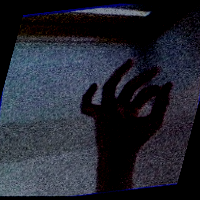

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0.]


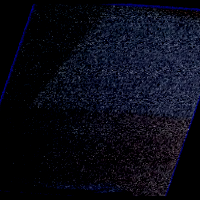

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


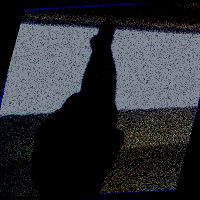

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0.]


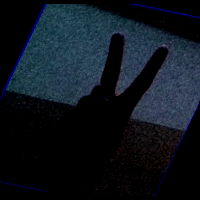

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


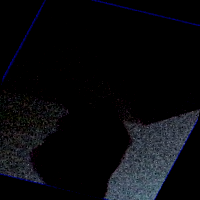

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


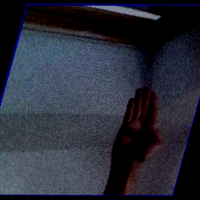

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0.]


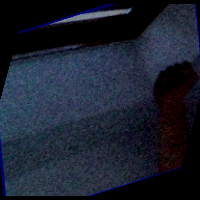

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0.]


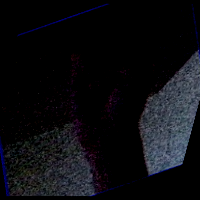

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


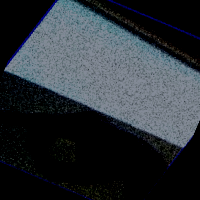

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


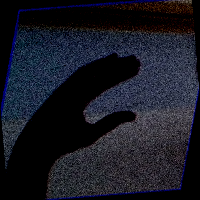

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0.]


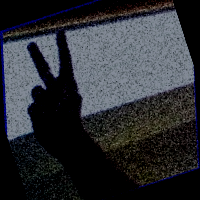

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


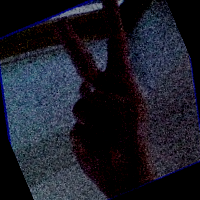

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


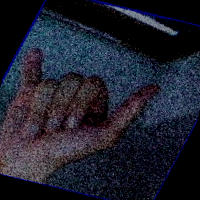

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


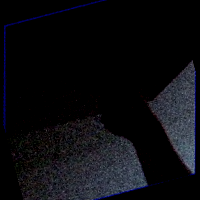

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


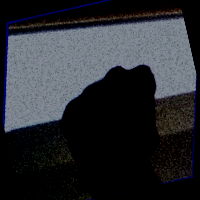

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1.]


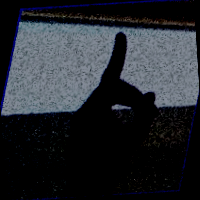

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0.]


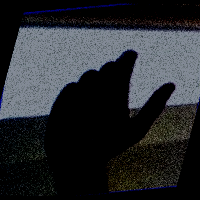

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


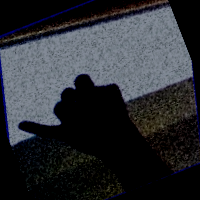

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0.]


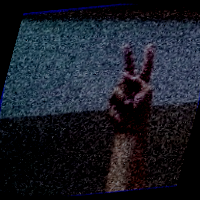

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


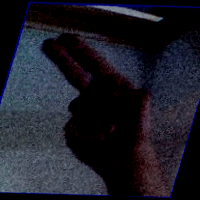

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


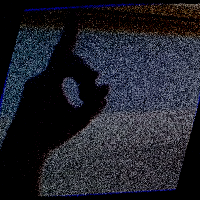

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0.]


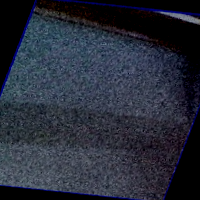

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


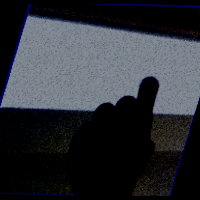

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


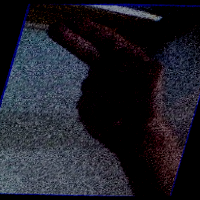

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


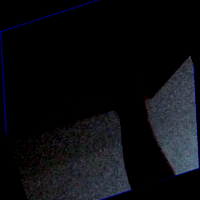

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


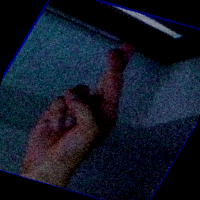

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0.]


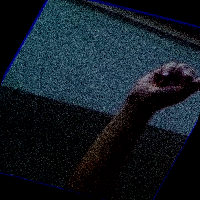

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


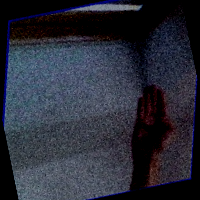

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0.]


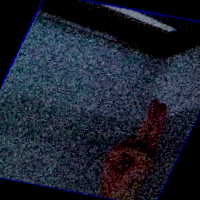

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


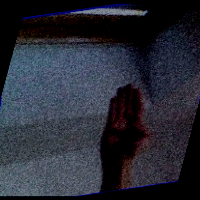

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0.]


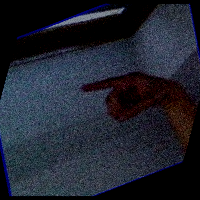

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


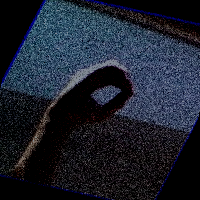

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [ ]:
for images, labels in train_generator:
  print(images.shape)
  print(labels.shape)
  for index in range(len(labels)):
    cv2_imshow(images[index])
    print(labels[index])
  break

# Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model = tf.keras.Sequential()

model.add(keras.layers.Conv2D(64, (3,3), activation="relu", padding="same", input_shape=(200,200,3)))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 66, 66, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 66, 66, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 66, 66, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 128)      0         
 2D)                                                    

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('checkpoint.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
model.fit(x = train_generator,
          validation_data = validation_generator,
          epochs=10,
          callbacks=[model_checkpoint_callback])

Epoch 1/10
2446/2446 [==============================] - 1351s 545ms/step - loss: 1.3376 - accuracy: 0.5992 - val_loss: 4.8026 - val_accuracy: 0.8549
Epoch 2/10
2446/2446 [==============================] - 1319s 539ms/step - loss: 0.1813 - accuracy: 0.9413 - val_loss: 5.8506 - val_accuracy: 0.9589
Epoch 3/10
2446/2446 [==============================] - 1321s 540ms/step - loss: 0.0940 - accuracy: 0.9691 - val_loss: 3.4389 - val_accuracy: 0.9665
Epoch 4/10
2446/2446 [==============================] - 1319s 539ms/step - loss: 0.0644 - accuracy: 0.9793 - val_loss: 7.2290 - val_accuracy: 0.9534
Epoch 5/10
2446/2446 [==============================] - 1318s 539ms/step - loss: 0.0518 - accuracy: 0.9832 - val_loss: 2.1650 - val_accuracy: 0.9591
Epoch 6/10
2446/2446 [==============================] - 1314s 537ms/step - loss: 0.0387 - accuracy: 0.9876 - val_loss: 194.8904 - val_accuracy: 0.9437
Epoch 7/10
2446/2446 [==============================] - 1319s 539ms/step - loss: 0.0362 - accuracy: 0.98